# # Project: Investigating Medical Appointment No Shows Data

## Table of Contents
><ol>
<li><b>Introduction</b></li><br>
<li><b>Data Wrangling</b></li><br>
<li><b>Exploratory Data Analysis</b></li><br>
<li><b>Conclusion</b></li>
</ol>

## Introduction

>This Dataset collects data of over 100k medical appointments from Brazil and is focused on whether or not patients show up for their appointment. A number of characterstics about the patient are included 
><ul>
<li><i>ScheduledDay</i>: tells us on what day the patient set up their appointment.</li>
<li><i>Neighborhood</i>: indicates the location of the hospital.</li>
<li><i>Scholarship</i>: indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.</li>
<li><i>No Show</i>: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.</li>
</ul>
>
<br><br>
><h3><b>Questions that I want to explore on the dataset are:</b></h3>
<ol>
<li><b>What is the percentage of patients who show up vs who do not show up for their appointment?</b></li>
<li><b>What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?</b></li>
</ol>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis

### General Properties

In [2]:
df=pd.read_csv('noshowappointments\KaggleV2-May-2016.csv')

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<p>All columns indicates the details of patient who scheduled their appointment.
The last column No-show indicates whether the patient has show up or do not show up with 'No' and 'Yes' respectively.
</p>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


<p>We can see that there are no null values in any of the columns</p>

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Describe provides the statistical details of each column. We can see there are some impractical values in the dataset like min age being -1 and max handcap value being 4 which we will be cleaning in the next step.

In [6]:
#check for duplicate data
sum(df.duplicated())

0

No duplicate data present in the dataset

In [7]:
#datatype check
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [8]:
type(df['ScheduledDay'][0])

str

We can see that ScheduledDay and appointmentDay is of type string but it has to be of type datetime which we will be modifying in the next step

In [9]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

need to convert the column names into lower case and necessary changes should be made



### Data Cleaning 

In [10]:
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [11]:
#drop the rows with age less than 0
df.drop(df[df['Age']<0].index,axis=0,inplace=True)

In [12]:
#drop the rows with handcap value greater than 1
df.drop(df[df['Handcap']>1].index,axis=0,inplace=True)

In [13]:
#change the column names to lower case
df.rename(columns=lambda x:x.lower(),inplace=True)

In [14]:
#change no-show column name to no_show
df.rename(columns=lambda x:x.replace('-','_'),inplace=True)

In [15]:
#change mistyped column names
df.rename(columns={'handcap':'handicap','alcoholism':'alcoholic','hipertension':'hypertension'},inplace=True)

In [16]:
#change the data types
df['scheduledday']=pd.to_datetime(df['scheduledday'])
df['appointmentday']=pd.to_datetime(df['appointmentday'])

In [17]:
#check whether datatypes are right or not
df.dtypes

patientid                float64
appointmentid              int64
gender                    object
scheduledday      datetime64[ns]
appointmentday    datetime64[ns]
age                        int64
neighbourhood             object
scholarship                int64
hypertension               int64
diabetes                   int64
alcoholic                  int64
handicap                   int64
sms_received               int64
no_show                   object
dtype: object

In [18]:
#check the column names
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholic', 'handicap', 'sms_received', 'no_show'],
      dtype='object')

In [19]:
# new column no_show_num
df['no_show_num']=df['no_show'].copy()
df['no_show_num'].replace('No',0,inplace=True)
df['no_show_num'].replace('Yes',1,inplace=True)

Created a new column named no_show_num. It contains the same information as that of no_show column but it consists numerical values so that it makes easy for plotting and calculating statistical data.

In [20]:
#new column age_group
bin_edges=[0,18,37,55,115]
bin_names=['child','teen','middle','old']
df['age_group']=pd.cut(df['age'],bin_edges,labels=bin_names)

created new column age_group so that we could easily classify patients according to their age and can analyze the results

In [21]:
#data after adding columns
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholic,handicap,sms_received,no_show,no_show_num,age_group
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,old
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,old
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,old
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,child
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,old


<a id='eda'></a>
## Exploratory Data Analysis

> We have trimmed and cleaned your data, we are ready to move on to exploration. Compute statistics and perform visualizations with the goal of addressing the research questions that we posed in the Introduction section.

### what is the percentage of patients who show up vs who do not show up for their appointment?

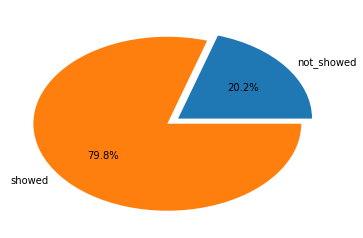

In [22]:
not_showed=df[df['no_show']=='Yes'].shape[0]
showed=df[df['no_show']=='No'].shape[0]
slices=[not_showed,showed]
plt.pie(slices,labels=['not_showed','showed'],autopct='%1.1f%%',explode=(0,0.1));

As we can oberve from the above pie chart, patients who show up for their appointment are 79.8% of the total data whereas patients who do not show up for appointment are 20.2%

### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

####  Gender

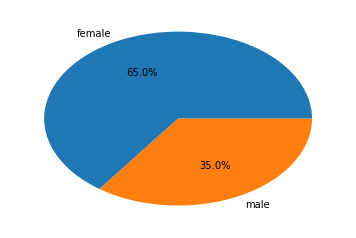

In [23]:
a=df.groupby('gender')['no_show'].count()
slices=[a[0],a[1]]
plt.pie(slices,labels=['female','male'],autopct='%1.1f%%');

There are more women patients compared to men patients

Text(0,0.5,'Mean of patients who did not show')

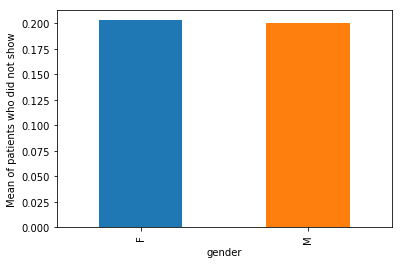

In [24]:
df.groupby('gender')['no_show_num'].mean().plot(kind='bar')
plt.ylabel('Mean of patients who did not show')

We can see that avg patients who do not are show up for their appointment for each gender are almost same

### scholarship

Text(0,0.5,'Mean of patients who did not show')

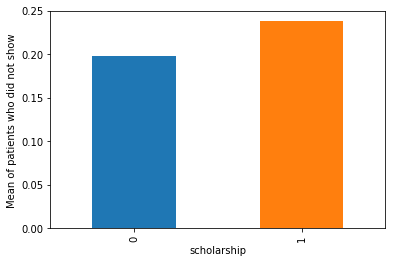

In [25]:
df.groupby('scholarship')['no_show_num'].mean().plot(kind='bar')
plt.ylabel('Mean of patients who did not show')

From the above bar chart we can observe that patients who are having scholarship are more likely do not show for their appointment comapred to the patients who do not have scholarship

### alcoholic

Text(0,0.5,'Mean of patients who did not show')

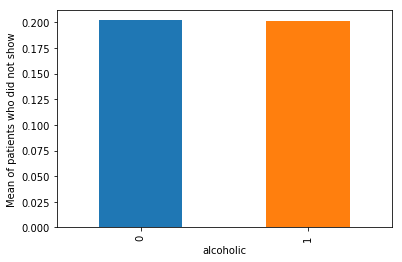

In [26]:
df.groupby('alcoholic')['no_show_num'].mean().plot(kind='bar')
plt.ylabel('Mean of patients who did not show')

### gender,age

Text(0,0.5,'Mean of patients who did not show')

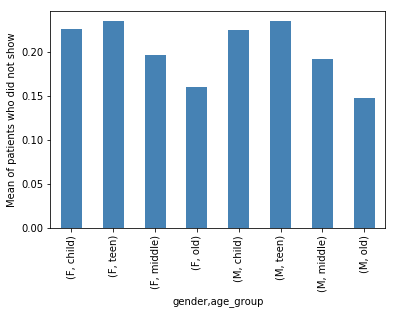

In [27]:
df.groupby(['gender','age_group'])['no_show_num'].mean().plot(kind='bar',color='steelblue')
plt.ylabel('Mean of patients who did not show')

We can observe from the above chart that patients of old age group are more likely to show up their appointment than other age groups, while least being the teen age group patients.

### handicap

Text(0,0.5,'Mean of patients who did not show')

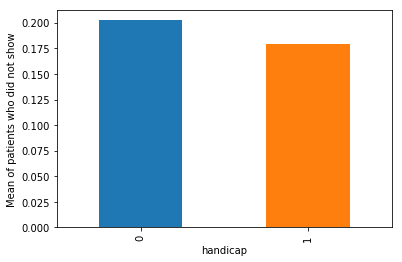

In [28]:
df.groupby('handicap')['no_show_num'].mean().plot(kind='bar')
plt.ylabel('Mean of patients who did not show')

We can observe patients who are handicapped are likely to show up their appointment than the patients who are not handicapped.

### sms_received

Text(0,0.5,'Mean of patients who did not show')

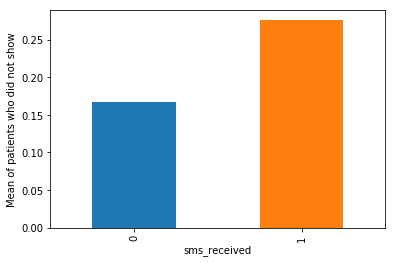

In [29]:
df.groupby('sms_received')['no_show_num'].mean().plot(kind='bar')
plt.ylabel('Mean of patients who did not show')

We can see that patients who recieve sms more likely do not show up for their appointment than patients who do not receive

### Diabetes

Text(0,0.5,'age')

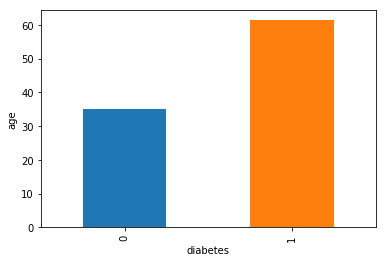

In [30]:
df.groupby('diabetes')['age'].mean().plot(kind='bar')
plt.ylabel('age')

patients of old age are more likely to have diabetes than that of other age groups

Text(0,0.5,'Mean of patients who did not show')

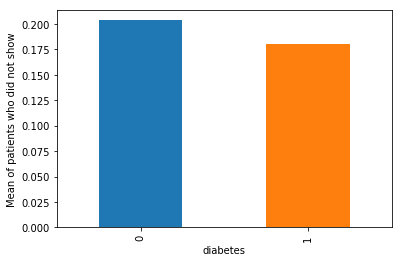

In [31]:
df.groupby('diabetes')['no_show_num'].mean().plot(kind='bar')
plt.ylabel('Mean of patients who did not show')

patients who do not have diabetes are less likely to show up for their appointment

### ScheduledDay,AppointmentDay

In [32]:
df['scheduledday']=df['scheduledday'].dt.date
df['scheduledday']=pd.to_datetime(df['scheduledday'])
df['diff_in_days']=df['appointmentday']-df['scheduledday']
a=df.groupby('diff_in_days')['no_show_num'].count()
b=df.groupby('diff_in_days')['no_show_num'].mean()

In [33]:

a=a[a.values>500]
a=a.to_frame('patients count')
b=b.to_frame('mean')
c=pd.merge(a,b,left_index=True,right_index=True)
c.reset_index(level=0,inplace=True)
c

,diff_in_days,patients count,mean
0,0 days,38485,0.046460
1,1 days,5204,0.213297
2,2 days,6712,0.237932
3,3 days,2730,0.235897
4,4 days,5279,0.232809
5,5 days,3266,0.265769
6,6 days,4028,0.247766
7,7 days,4904,0.266925
8,8 days,2328,0.287801
9,9 days,1605,0.274143


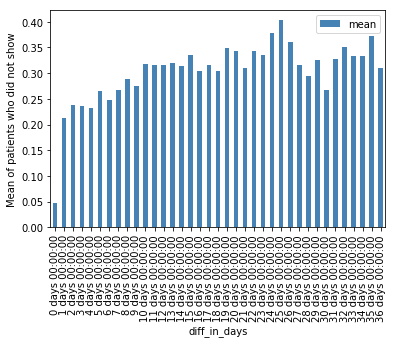

In [34]:
c.plot.bar(x='diff_in_days',y='mean',color='steelblue')
plt.ylabel('Mean of patients who did not show');


We can clearly observe that difference in days between scheduled day and appointment day plays a key role. patients who scheduled their appointment on the same day are by far most likely to show up for their appointment than patients who scheduled their appointment on previous days. Also we can observe an irregular rising trend which is indicating that patients who scheduled their appointment so many days prior to the appointment day are less likely to show for their appointment.

### Neighbourhood

In [35]:
x=df.groupby('neighbourhood')['no_show_num'].count()
y=df.groupby('neighbourhood')['no_show_num'].mean()
x=x[x.values>1000]
x=x.to_frame('patients count')
y=y.to_frame('mean')
z=pd.merge(x,y,left_index=True,right_index=True)
z.reset_index(level=0,inplace=True)
z['neighbourhood']=z['neighbourhood'].str.lower()
z

,neighbourhood,patients count,mean
0,andorinhas,2255,0.230599
1,bela vista,1899,0.202212
2,bonfim,2770,0.198195
3,caratoíra,2564,0.230109
4,centro,3330,0.210511
5,consolação,1376,0.172238
6,cruzamento,1398,0.217454
7,da penha,2210,0.193665
8,forte são joão,1889,0.183166
9,grande vitória,1071,0.202614


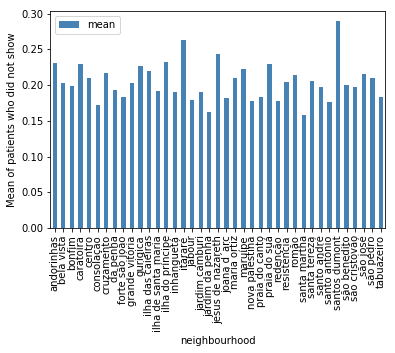

In [36]:
z.plot.bar('neighbourhood','mean',color='steelblue');
plt.ylabel('Mean of patients who did not show');

Patients in the neighbourhood of santos dumont are highest in missing their appointment

<a id='conclusions'></a>
## Conclusions

> Finally, summarizing the findings and the results that have been performed.

<ul>
<li>20.2% patients do not for their appointments while 79.8% patients attend their appointment</li>
<li>65% of patients who had their appointments are female</li>
<li>The important factor to decide the no show is their scheduled and appointment dates.</li>
<li>Patients who schedule their appointment on the same are more likely to show for their appointment</li>
<li>Sending SMS is not required as we can see better percentage of patients who attended their appointment did not receive sms</li>
<li>28.9% patients of santos dumont neighbourhood are likely to not show up their appointment which is the highest </li>
<li>Old age patients are more likely to attend their appointment compared to other age group patients</li>
<li>It is observed that patients having scholarship are likely to miss their appointments than patients who do not have scholarship</li>
<li>We can observe that patients who have diabetes are less likely to miss their appointments</li>
<li>Factors like gender,alcoholic are not factors to decide whether patient will show or not show</li>
</ul>